In [1]:
import numpy as np
import pandas as pd
from hmmlearn.hmm import GaussianHMM
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
from alpaca_trade_api.rest import REST, TimeFrame
# Replace ’key’ and ’secret’ with your actual API key and secret
api_key = 'PK023SWL8898FCFZBQZK'
api_secret = 'FzlCw3GTnQO2b46WxRWxTdahZQDbYPuuzPs8tRl1'
# Create an Alpaca API connection
api = REST(api_key, api_secret)

In [3]:
Raw_Data = api.get_bars('AAPL', TimeFrame.Day, '2010-01-04', '2018-06-29',
                        adjustment='raw')
Raw_Data.df

,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2016-01-04 05:00:00+00:00,105.35,105.368,102.00,351452,102.6100,71935339,104.091749
2016-01-05 05:00:00+00:00,102.71,105.850,102.41,321365,105.7500,58690536,103.400868
2016-01-06 05:00:00+00:00,100.70,102.370,99.87,409164,100.5600,71079827,100.843959
2016-01-07 05:00:00+00:00,96.45,100.130,96.43,462836,98.6800,85996453,98.011371
2016-01-08 05:00:00+00:00,96.96,99.110,96.76,419555,98.5500,75066292,97.897369
...,...,...,...,...,...,...,...
2018-06-25 04:00:00+00:00,182.17,184.920,180.73,241964,183.4000,33901357,182.356842
2018-06-26 04:00:00+00:00,184.43,186.530,182.54,169650,182.9900,27229704,184.698774
2018-06-27 04:00:00+00:00,184.16,187.280,184.03,179717,185.2278,27186771,185.400595


In [4]:
raw = pd.read_csv('./data/tr_eikon_eod_data.csv', 
                  index_col=0, parse_dates=True)

In [5]:
selected = ['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N']

In [6]:
data = pd.DataFrame(raw[selected].dropna())

In [7]:
for stock in selected:
    data['Returns_' + stock] = np.log(data[stock] / data[stock].shift(1)).dropna()
    data['Returns_' + stock].fillna(0, inplace=True)

/var/folders/2b/tgv3r4pj32b_81f22_mtv7bh0000gn/T/ipykernel_30737/3804593244.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Returns_' + stock].fillna(0, inplace=True)
/var/folders/2b/tgv3r4pj32b_81f22_mtv7bh0000gn/T/ipykernel_30737/3804593244.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [8]:
for stock in selected:
    data['direction_' + stock] = np.sign(data['Returns_' + stock]).dropna().astype(int)

In [9]:
split = int(len(data)*0.8)
data_train = data.iloc[:split].copy()
data_test = data.iloc[split:].copy()

In [10]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


In [11]:
import yfinance as yf
import datetime
import time
import requests
import io

In [12]:
data = yf.download("MSFT", start="2010-01-04", end="2018-06-30")

[*********************100%%**********************]  1 of 1 completed


In [13]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.431591,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.439159,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.295317,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.053049,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.212036,51197400
...,...,...,...,...,...,...
2018-06-25,100.000000,100.110001,97.300003,98.389999,92.501282,35433300
2018-06-26,98.820000,100.080002,98.750000,99.080002,93.149986,26897200
2018-06-27,99.580002,100.019997,97.400002,97.540001,91.702164,31298400


In [14]:
train_size = int(0.8*data.shape[0])
print(train_size)

1710


In [15]:
train_data = data.iloc[0:train_size]
test_data = data.iloc[train_size:]

In [16]:
def augment_features(dataframe):
    fracocp = (dataframe['Close']-dataframe['Open'])/dataframe['Open']
    frachp = (dataframe['High']-dataframe['Open'])/dataframe['Open']
    fraclp = (dataframe['Open']-dataframe['Low'])/dataframe['Open']
    new_dataframe = pd.DataFrame({'delOpenClose': fracocp,
                                 'delHighOpen': frachp,
                                 'delLowOpen': fraclp})
    new_dataframe.set_index(dataframe.index)
    
    return new_dataframe

In [17]:
def extract_features(dataframe):
    return np.column_stack((dataframe['delOpenClose'], dataframe['delHighOpen'], dataframe['delLowOpen']))

In [18]:
features = extract_features(augment_features(train_data))

In [19]:
features.shape

(1710, 3)

In [20]:
model = GaussianHMM(n_components=10)

In [21]:
feature_train_data = augment_features(train_data)
features_train = extract_features(feature_train_data)
model.fit(features_train)

GaussianHMM(n_components=10)

In [22]:
import itertools

test_augmented = augment_features(test_data)
fracocp = test_augmented['delOpenClose']
frachp = test_augmented['delHighOpen']
fraclp = test_augmented['delLowOpen']

sample_space_fracocp = np.linspace(fracocp.min(), fracocp.max(), 50)
sample_space_fraclp = np.linspace(fraclp.min(), frachp.max(), 10)
sample_space_frachp = np.linspace(frachp.min(), frachp.max(), 10)

possible_outcomes = np.array(list(itertools.product(sample_space_fracocp, sample_space_frachp, sample_space_fraclp)))

In [23]:
num_latent_days = 50
num_days_to_predict = 428

In [24]:
predicted_close_prices = []
for i in tqdm(range(num_days_to_predict)):
    # Calculate start and end indices
    previous_data_start_index = max(0, i - num_latent_days)
    previous_data_end_index = max(0, i)
    # Acquire test data features for these days
    previous_data = extract_features(augment_features(test_data.iloc[previous_data_start_index:previous_data_end_index]))
    
    outcome_scores = []
    for outcome in possible_outcomes:
        # Append each outcome one by one with replacement to see which sequence generates the highest score
        total_data = np.row_stack((previous_data, outcome))
        outcome_scores.append(model.score(total_data))
        
    # Take the most probable outcome as the one with the highest score
    most_probable_outcome = possible_outcomes[np.argmax(outcome_scores)]
    predicted_close_prices.append(test_data.iloc[i]['Open'] * (1 + most_probable_outcome[0]))

100%|██████████| 428/428 [16:49<00:00,  2.36s/it]


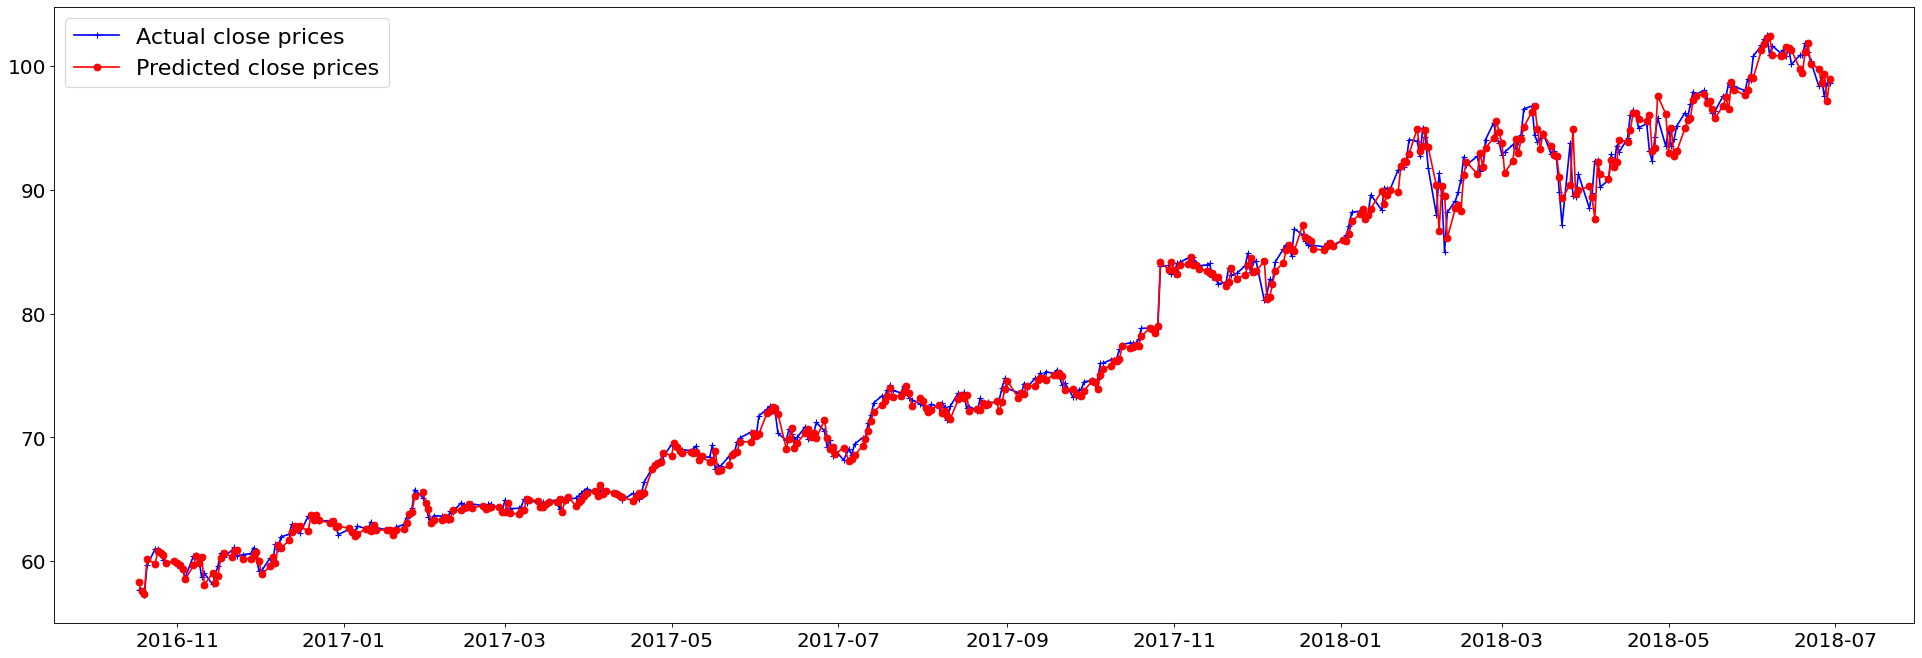

In [25]:
plt.figure(figsize=(30,10), dpi=80)
plt.rcParams.update({'font.size': 18})

x_axis = np.array(test_data.index[0:num_days_to_predict], dtype='datetime64[ms]')
plt.plot(x_axis, test_data.iloc[0:num_days_to_predict]['Close'], 'b+-', label="Actual close prices")
plt.plot(x_axis, predicted_close_prices, 'ro-', label="Predicted close prices")
plt.legend(prop={'size': 20})
plt.show()

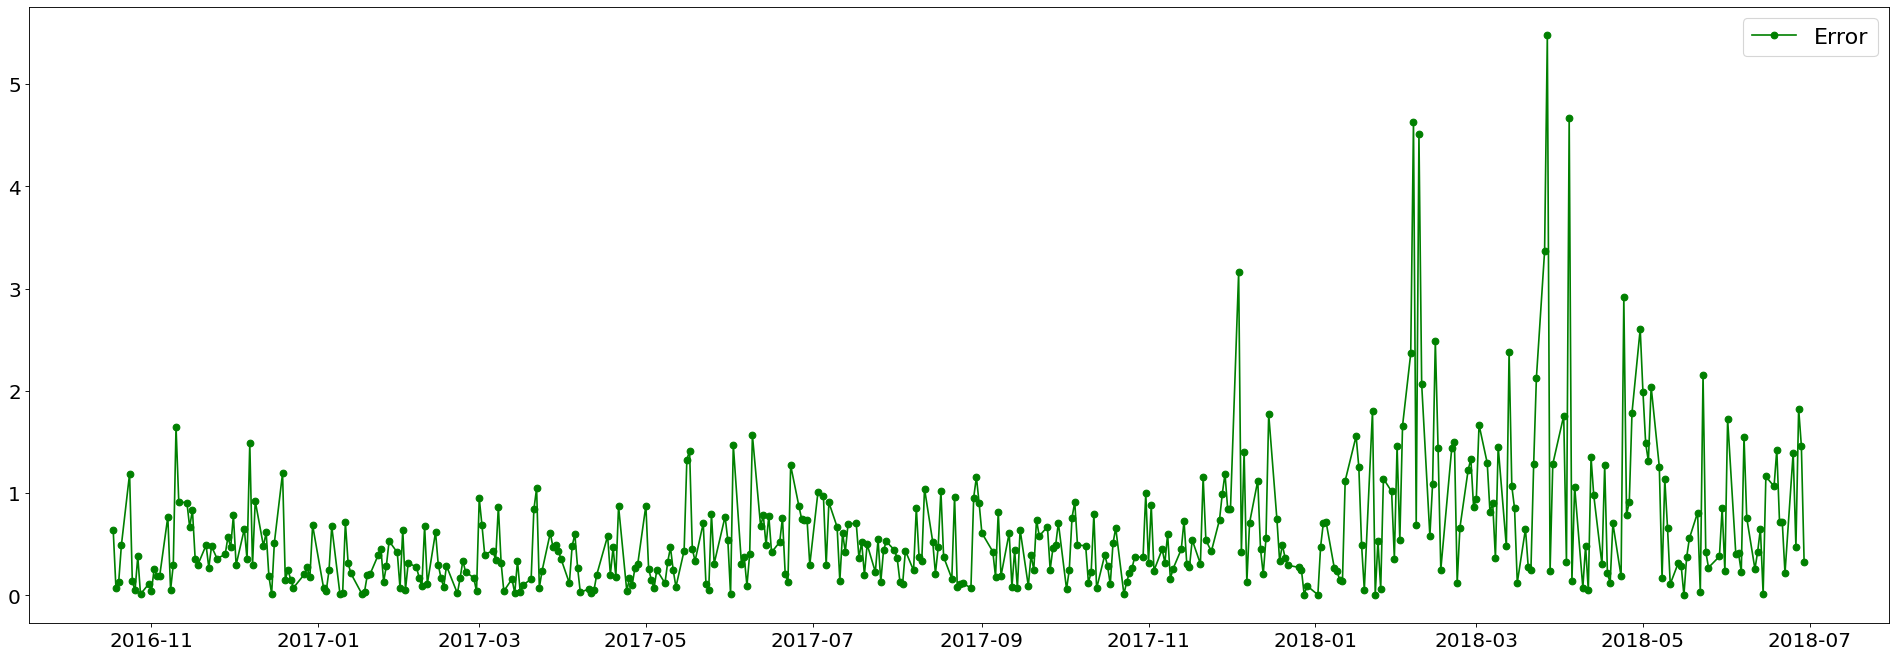

In [26]:
ae = abs(test_data.iloc[0:num_days_to_predict]['Close'] - predicted_close_prices)

plt.figure(figsize=(30,10), dpi=80)

plt.plot(x_axis, ae, 'go-', label="Error")
plt.legend(prop={'size': 20})
plt.show()

In [27]:
print("Max error observed = " + str(ae.max()))
print("Min error observed = " + str(ae.min()))
print("Mean error observed = " + str(ae.mean()))

Max error observed = 5.476635610830243
Min error observed = 0.0007935930545954761
Mean error observed = 0.6129412994759293


In [139]:
trading_signals = np.sign(pd.Series(predicted_close_prices).diff()).fillna(0).astype(int)
trading_signals = trading_signals.tolist()

In [140]:
predicted_close_prices

[58.299856899818394,
 57.60152375538797,
 57.376444990949814,
 60.15047015677998,
 59.81120059066044,
 60.85425066096258,
 60.67933389033416,
 60.47976288558732,
 59.88104987134679,
 60.030729076532,
 59.84113871559767,
 59.69145951041246,
 59.40208174385455,
 58.52397541336893,
 59.65154454816303,
 60.41989044221317,
 59.87107303403459,
 60.350041161526825,
 58.10487592275053,
 59.024124764676145,
 58.20466332837411,
 58.81334937342653,
 60.280191880840476,
 60.64939576539694,
 60.369998642651545,
 60.84896677014378,
 60.8789010885807,
 60.1704276379047,
 60.21034260015413,
 60.51967784783675,
 60.7292256898958,
 59.98083727697037,
 58.95305174129954,
 59.57171843016447,
 60.3001493619652,
 59.88104987134679,
 61.30428286987362,
 61.048537774890626,
 61.68716194488028,
 62.36570107711936,
 62.86462668573632,
 62.565272081866205,
 62.81473488617468,
 62.42557352049351,
 63.694449272245315,
 63.29370301366692,
 63.70282186047282,
 63.31366049479164,
 63.074174527795364,
 63.263768695230

In [141]:
data_test['MSFT.O']

Date
2016-10-18    57.66
2016-10-19    57.53
2016-10-20    57.25
2016-10-21    59.66
2016-10-24    61.00
              ...  
2018-06-25    98.39
2018-06-26    99.08
2018-06-27    97.54
2018-06-28    98.63
2018-06-29    98.61
Name: MSFT.O, Length: 428, dtype: float64

In [102]:
negative_trading_signals = trading_signals * -1

In [113]:
data_test['direction_MSFT.O']

Date
2016-10-18    1
2016-10-19   -1
2016-10-20   -1
2016-10-21    1
2016-10-24    1
             ..
2018-06-25   -1
2018-06-26    1
2018-06-27   -1
2018-06-28    1
2018-06-29   -1
Name: direction_MSFT.O, Length: 428, dtype: int64

In [138]:
print((trading_signals != data_test['direction_MSFT.O']).sum() / len(trading_signals))

0.4953271028037383


In [133]:
predicted_close_prices

[58.299856899818394,
 57.60152375538797,
 57.376444990949814,
 60.15047015677998,
 59.81120059066044,
 60.85425066096258,
 60.67933389033416,
 60.47976288558732,
 59.88104987134679,
 60.030729076532,
 59.84113871559767,
 59.69145951041246,
 59.40208174385455,
 58.52397541336893,
 59.65154454816303,
 60.41989044221317,
 59.87107303403459,
 60.350041161526825,
 58.10487592275053,
 59.024124764676145,
 58.20466332837411,
 58.81334937342653,
 60.280191880840476,
 60.64939576539694,
 60.369998642651545,
 60.84896677014378,
 60.8789010885807,
 60.1704276379047,
 60.21034260015413,
 60.51967784783675,
 60.7292256898958,
 59.98083727697037,
 58.95305174129954,
 59.57171843016447,
 60.3001493619652,
 59.88104987134679,
 61.30428286987362,
 61.048537774890626,
 61.68716194488028,
 62.36570107711936,
 62.86462668573632,
 62.565272081866205,
 62.81473488617468,
 62.42557352049351,
 63.694449272245315,
 63.29370301366692,
 63.70282186047282,
 63.31366049479164,
 63.074174527795364,
 63.263768695230

In [135]:
data_test['MSFT.O_Signal'] = trading_signals
data_test['MSFT.O_Signal']

Date
2016-10-18    0
2016-10-19   -1
2016-10-20   -1
2016-10-21    1
2016-10-24   -1
             ..
2018-06-25   -1
2018-06-26   -1
2018-06-27    1
2018-06-28   -1
2018-06-29    1
Name: MSFT.O_Signal, Length: 428, dtype: int64

In [ ]:
data_test

In [136]:
data_test['Returns_benchmark_MSFT'] = data_test['direction_MSFT.O'] * data_test['Returns_MSFT.O']
data_test['Returns_HMM_MSFT'] = data_test['MSFT.O_Signal'] * data_test['Returns_MSFT.O']

In [137]:
print(data_test[['Returns_benchmark_MSFT', 'Returns_HMM_MSFT']].sum().apply(np.exp))

Returns_benchmark_MSFT    35.690425
Returns_HMM_MSFT           1.590550
dtype: float64


In [31]:
num_latent_days_values = [10, 20, 30, 40, 50, 60]
baseline_num_latent_days = 50
n_components_values = [4, 6, 8, 10, 12, 14]
baseline_n_componets = 10
num_steps_values = [10, 20, 40, 50]
baseline_num_steps = 50
num_days_to_predict = 100 

In [ ]:
mae_num_components = []
for num_component in n_components_values:
    model = GaussianHMM(n_components=num_component)
    model.fit(features_train)
    predicted_close_prices = []
    for i in tqdm(range(num_days_to_predict)):
        # Calculate start and end indices
        previous_data_start_index = max(0, i - baseline_num_latent_days)
        previous_data_end_index = max(0, i)
        # Acquire test data features for these days
        previous_data = extract_features(augment_features(test_data.iloc[previous_data_start_index:previous_data_end_index]))

        outcome_scores = []
        for outcome in possible_outcomes:
            # Append each outcome one by one with replacement to see which sequence generates the highest score
            total_data = np.row_stack((previous_data, outcome))
            outcome_scores.append(model.score(total_data))

        # Take the most probable outcome as the one with the highest score
        most_probable_outcome = possible_outcomes[np.argmax(outcome_scores)]
        predicted_close_prices.append(test_data.iloc[i]['Open'] * (1 + most_probable_outcome[0]))
    mae_num_components.append((abs(test_data.iloc[0:num_days_to_predict]['Close'] - predicted_close_prices)).mean())

In [ ]:
plt.figure(figsize=(30,10), dpi=80)

plt.plot(n_components_values, mae_num_components, 'go-', label="Error")
plt.xlabel("Number of hidden states")
plt.ylabel("MAE")
plt.legend(prop={'size': 20})
plt.show()